# BIBLIOTECAS

In [9]:
# =============================
# script para testes

# Made by: Lucas da Silva Menezes
# 31/07/2023
# =============================

# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt

# import locais
from scripts.calc import *
import scripts.cooling_rate as cooling_rate


**Funções**

In [10]:
def wyoming_read(file_path):

	# NOME DE CADA COLUNA NA SONDAGEM | unidade
	colunas = [
		'pres', # hPa
		'hght', # m
		'temp', # °C
		'dwpt', # °C
		'relh', # %
		'mixr', # g / kg
		'drct', # ° [0, 360]
		'sknt', # Knot
		'thta', # K
		'thte', # K
		'thtv' # K
	]

	# lendo o arquivo
	df = pd.read_csv(
		file_path,
		sep = '\s+',
		names = colunas
	)

	# convertendo para as unidades que serao usadas
	df['temp'] = df.temp + 273.15 # °C para K
	df['dwpt'] = df.dwpt + 273.15 # °C para K

	# Converte a razao de mistura pra kg / kg
	df['mixr'] = df['mixr'] * 1e-3

	# Filtra para z < 15 km e as pega as colunas necessarias
	df = df.loc[df['hght'] < 15000][colunas[:-5]]

	# Calcula a densidade do vapor
	df['vapor_density'] = density_water_vapor(
		T = df['temp'],
		Td  = df['dwpt'],
	) # em Kg / m³

	# Calcula o path length [Kg / m²]
	df['u'] = path_length(df['vapor_density'].values, df['hght'].values)

	# converte para g/cm²
	df['u'] = df['u'] * 1e-1

	# filtra e retorna
	return df

In [11]:
df = wyoming_read(r".\Dados\sbgl_00z_06ago23.txt")
df

,pres,hght,temp,dwpt,relh,mixr,vapor_density,u
0,1021.0,9,293.55,290.15,81,0.01208,1.429312e-02,2.553647
1,1009.0,111,295.35,291.45,79,0.01329,1.542025e-02,2.402109
2,1000.0,189,295.35,290.95,76,0.01299,1.494286e-02,2.283693
3,929.0,827,291.15,289.95,93,0.01312,1.422921e-02,1.353104
4,925.0,864,291.15,289.45,90,0.01276,1.378367e-02,1.301280
5,885.0,1243,289.55,286.85,84,0.01125,1.172330e-02,0.817923
6,866.0,1428,290.55,279.55,48,0.00701,7.166768e-03,0.643189
7,850.0,1587,289.15,280.15,55,0.00744,7.504661e-03,0.526552
8,848.0,1607,289.05,279.95,55,0.00734,7.404928e-03,0.511642
9,830.0,1789,287.75,277.75,51,0.00645,6.386736e-03,0.386138


**Cooling rate (sem nuvens)**

In [12]:
# ------------- SIGLAS -------------
# cr = cooling rate

# nc = no clouds

# rot = rotational
# cont = continuum
# vib = vibrational
# all =  all bands (rot + cont + vib)

df['cr_nc_rot'] = cooling_rate.no_clouds(
    T = df['temp'].values,
    u = df['u'].values,
    q = df['mixr'].values,
    p = df['pres'].values,
    ur = df['relh'].values,
    band = 'rotational' # Banda rotacional (0 a 1000 cm^-1)
)

df['cr_nc_cont'] = cooling_rate.no_clouds(
    T = df['temp'].values,
    u = df['u'].values,
    q = df['mixr'].values,
    p = df['pres'].values,
    ur = df['relh'].values,
    band = 'continuum' # Banda continuum (10µm)
)

df['cr_nc_vib'] = cooling_rate.no_clouds(
    T = df['temp'].values,
    u = df['u'].values,
    q = df['mixr'].values,
    p = df['pres'].values,
    ur = df['relh'].values,
    band = 'vibrational' # Banda vibrational-rotational (6.3µm)
)

df['cr_nc_all'] = cooling_rate.no_clouds(
    T = df['temp'].values,
    u = df['u'].values,
    q = df['mixr'].values,
    p = df['pres'].values,
    ur = df['relh'].values,
    band = 'all' # Todas as bandas
)

df

,pres,hght,temp,dwpt,relh,mixr,vapor_density,u,cr_nc_rot,cr_nc_cont,cr_nc_vib,cr_nc_all
0,1021.0,9,293.55,290.15,81,0.01208,1.429312e-02,2.553647,NaN,NaN,NaN,NaN
1,1009.0,111,295.35,291.45,79,0.01329,1.542025e-02,2.402109,NaN,NaN,NaN,NaN
2,1000.0,189,295.35,290.95,76,0.01299,1.494286e-02,2.283693,-5.196753,-2.033145,-0.451948,-7.681846
3,929.0,827,291.15,289.95,93,0.01312,1.422921e-02,1.353104,-2.543487,-0.156720,-0.231137,-2.931344
4,925.0,864,291.15,289.45,90,0.01276,1.378367e-02,1.301280,-1.804267,-0.006065,-0.191465,-2.001798
5,885.0,1243,289.55,286.85,84,0.01125,1.172330e-02,0.817923,-1.898760,0.058125,-0.208517,-2.049152
6,866.0,1428,290.55,279.55,48,0.00701,7.166768e-03,0.643189,-1.779215,-0.387449,-0.254678,-2.421341
7,850.0,1587,289.15,280.15,55,0.00744,7.504661e-03,0.526552,-2.511964,-0.412663,-0.370930,-3.295558
8,848.0,1607,289.05,279.95,55,0.00734,7.404928e-03,0.511642,-2.374893,-0.157052,-0.323077,-2.855023
9,830.0,1789,287.75,277.75,51,0.00645,6.386736e-03,0.386138,-2.416009,-0.033239,-0.316322,-2.765570


**Figura**

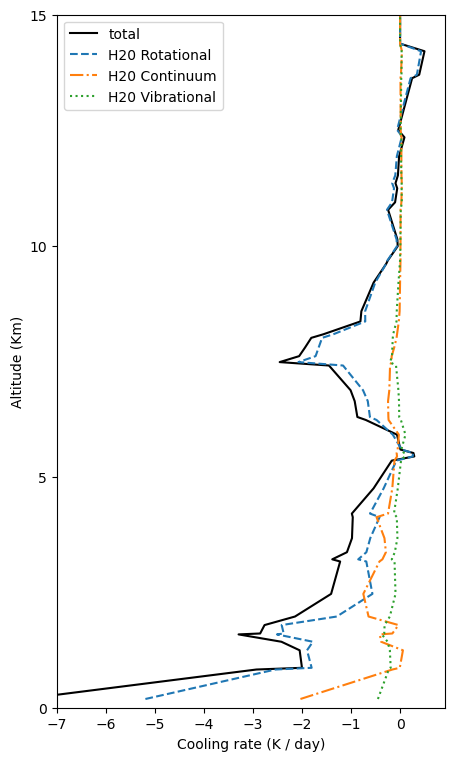

In [13]:
fig, ax  = plt.subplots(figsize = (5, 9))

ax.plot(df['cr_nc_all'], df['hght'] * 1e-3, linestyle = 'solid', color = 'k', label = 'total')
ax.plot(df['cr_nc_rot'], df['hght'] * 1e-3, linestyle =  'dashed', label = 'H20 Rotational')
ax.plot(df['cr_nc_cont'], df['hght'] * 1e-3, linestyle = 'dashdot', label = 'H20 Continuum')
ax.plot(df['cr_nc_vib'], df['hght'] * 1e-3, linestyle = 'dotted', label = 'H20 Vibrational')

# Eixo Y
ax.set_ylim(0, 15)
ax.set_yticks([0, 5, 10, 15])

# Eixo X
left, right = ax.get_xlim()
ax.set_xticks(np.arange(-20, 20, 1))
ax.set_xlim(-7, right)

# Textos
ax.set_ylabel("Altitude (Km)")
ax.set_xlabel("Cooling rate (K / day)")

# Legenda
plt.legend()

plt.show()